<font color=black size=5>Part 1 Import Libraries</font>

In [1]:
import torch                                  # Torch for Pytorch base (for deep learning)

In [2]:
# Part 1
import numpy as np                            # numpy for numerical computation
import torchvision                            # TorchVision for image processing
import matplotlib.pyplot as plt               # Plotting tools
from time import time                         # Timing tools
from torchvision import datasets, transforms  # Import dataset and transform functions
from torch import nn, optim                   # Import neural network and optimization classes
import cv2  

<font color=black size=5>Part 2 Data Pre-processing Transform</font>

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# transform is a global class object that does the transform for you.

<font color=black size=5>Part 3 Download Data</font>

In [4]:
# Download the training data and the validation data
trainset    = datasets.MNIST('./MNIST/', download=True, train=True, transform=transform)
valset      = datasets.MNIST('./MNIST/', download=True, train=False, transform=transform)

# Define the loader that loads images into the correct format
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader   = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# Create iteration objection, images, and labels
dataiter = iter(trainloader)
images, labels = dataiter.next()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



<font color=black size=5>Part 4 Construct Your Model</font>

In [5]:
# Here we construct the neural network. There is no training involved yet. We are only defining the model.
input_size = 784
hidden_sizes = [128, 64, 32]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))

<font color=black size=5>Part 5 Construct the training loss</font>

In [6]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)                 #log probabilities
loss = criterion(logps, labels)       #calculate the NLL loss

<font color=black size=5>Part 6 Main Training Loop</font>

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 2
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.8874483321711961
Epoch 1 - Training loss: 0.30277637838681876

Training Time (in minutes) = 4.545971580346426


<font color=black size=5>Part 7 Testing</font>

Predicted Digit = 2


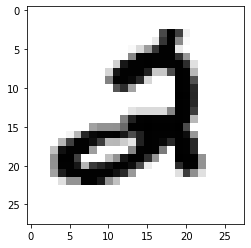

In [8]:
images, labels = next(iter(valloader))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

<font color=black size=5>Part 8 Testing</font>

In [14]:
# # Using cv2.imread() method 
# # Using 0 to read image in grayscale mode 
# img = cv2.imread('digit_2.png', 0)  # You will need to change the filename
# # resize image to 28x28
# img = cv2.resize(img, (28,28),interpolation=cv2.INTER_LANCZOS4)

# # flip the image color
# # this is optional; and feel free to change it
# for i in range(0,img.shape[0]):
#   for j in range(0,img.shape[1]):
#     if img[i,j]>125:
#       img[i,j] = 0
#     else:
#       img[i,j] = 255 - img[i,j]

# # plot the processed image
# plt.imshow(img, cmap='gray_r')

# # input the processed image to the network and make prediction
# img = transform(img).view(1, 784)
# with torch.no_grad():
#     logps = model(img)
# ps = torch.exp(logps)
# probab = list(ps.numpy()[0])
# print("Predicted Hand-written Digit =", probab.index(max(probab)))